<p style="text-align:center">
    <a href="https://www.linkedin.com/company/mt-learners/?viewAsMember=true" target="_blank">
    <img src="https://github.com/Mr-MeerMoazzam/Mr-MeerMoazzam/blob/main/Untitled-2.jpg?raw=true" width="150" alt="MT Learners"  />
    </a>
</p>

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### loading the data

In [2]:
df=pd.read_csv('D:\csv files\customer.csv')
df.head(10)

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No
5,31,Female,Average,School,Yes
6,18,Male,Good,School,No
7,60,Female,Poor,School,Yes
8,65,Female,Average,UG,No
9,74,Male,Good,UG,Yes


In [3]:
df=df.iloc[:,2:]
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


### Train Test Split

In [4]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [5]:
x_train

,review,education
19,Poor,PG
21,Average,PG
42,Good,PG
14,Poor,PG
35,Poor,School
15,Poor,UG
49,Good,UG
48,Good,UG
16,Poor,UG
30,Average,UG


<AxesSubplot:xlabel='purchased', ylabel='count'>

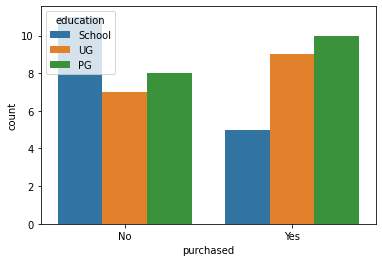

In [20]:
sns.countplot(x="purchased",hue="education",data=df)

<AxesSubplot:xlabel='purchased', ylabel='count'>

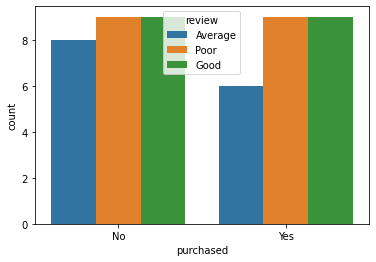

In [21]:
sns.countplot(x="purchased",hue="review",data=df)

<AxesSubplot:>

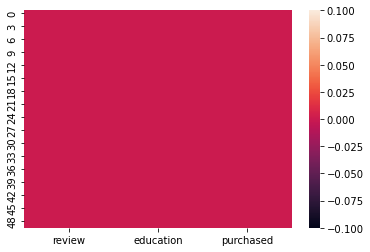

In [24]:
sns.heatmap(df.isnull())

### Ordinal Encoding
In ordinal encoding, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.

For some variables, an ordinal encoding may be enough. The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [8]:
oe.fit(x_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [9]:
x_train=oe.transform(x_train)

In [10]:
x_train

array([[0., 2.],
       [1., 2.],
       [2., 2.],
       [0., 2.],
       [0., 0.],
       [0., 1.],
       [2., 1.],
       [2., 1.],
       [0., 1.],
       [1., 1.],
       [0., 2.],
       [2., 2.],
       [2., 0.],
       [0., 0.],
       [1., 1.],
       [0., 2.],
       [2., 0.],
       [1., 2.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [2., 0.],
       [0., 2.],
       [1., 1.],
       [2., 0.],
       [1., 1.],
       [2., 2.],
       [2., 2.],
       [2., 1.],
       [2., 2.],
       [1., 0.],
       [2., 2.],
       [0., 1.],
       [2., 1.],
       [0., 2.],
       [0., 0.],
       [2., 0.],
       [1., 1.],
       [2., 0.],
       [1., 0.]])

In [11]:

x_test=oe.transform(x_test)
x_test

array([[0., 2.],
       [1., 2.],
       [0., 0.],
       [2., 1.],
       [1., 1.],
       [2., 1.],
       [1., 0.],
       [0., 2.],
       [0., 2.],
       [0., 1.]])

In [12]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

### before label encoding

In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
prediction=model.predict(x_test)
prediction

array(['Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No'],
      dtype=object)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          No       0.33      0.50      0.40         4
         Yes       0.50      0.33      0.40         6

    accuracy                           0.40        10
   macro avg       0.42      0.42      0.40        10
weighted avg       0.43      0.40      0.40        10



### Label Encoding
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [27]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [28]:
y_train=le.transform(y_train)
y_test=le.transform(y_test)


In [30]:
y_train

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [29]:
y_test

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

### effect after label encoding

In [31]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
prediction=model.predict(x_test)
prediction

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       0.33      0.50      0.40         4
           1       0.50      0.33      0.40         6

    accuracy                           0.40        10
   macro avg       0.42      0.42      0.40        10
weighted avg       0.43      0.40      0.40        10



### Thank you
### Author

<a href="https://www.linkedin.com/in/muhammad-bilal-afzal-95b33323b/">Muhammad Bilal</a>

<div data-mime-type="text/markdown" class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput">
<hr>

<h2></h2><h3 align="center"> © <a href="https://www.linkedin.com/company/mt-learners/">Mt Learners</a> 2022. All rights reserved. </h3><h3></h3>

</div>